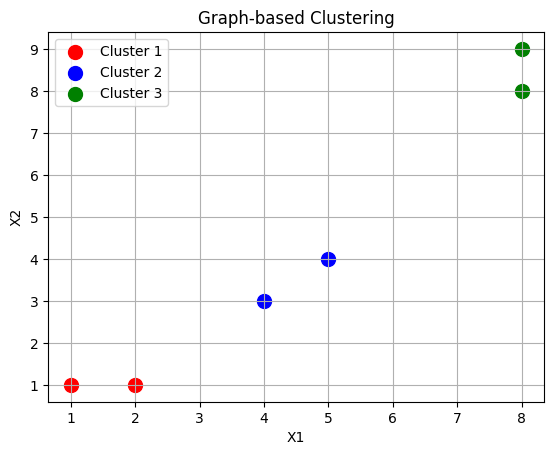

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.csgraph import connected_components

# Node positions
X = [[1,1],[2,1],[4,3],[5,4],[8,8],[8,9]]

# Adjacency matrix (convert to numpy array)
adj = np.array([
    [0,1,0,0,0,0],
    [1,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,0,1,0,0,0],
    [0,0,0,0,0,1],
    [0,0,0,0,1,0]
])

# Find clusters
n, labels = connected_components(csgraph=adj, directed=False)

# Plot clusters
colors = ['red','blue','green','purple','orange']
for i in range(n):
    pts = [X[j] for j in range(len(X)) if labels[j]==i]
    plt.scatter([p[0] for p in pts], [p[1] for p in pts], color=colors[i], s=100, label=f'Cluster {i+1}')

plt.xlabel('X1'); plt.ylabel('X2'); plt.title('Graph-based Clustering')
plt.legend(); plt.grid(True); plt.show()


In [1]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import accuracy_score

# 🔹 Step 1: Adjacency matrix (graph)
A = np.array([
    [0,1,1,0,0,0],
    [1,0,1,0,0,0],
    [1,1,0,0,0,0],
    [0,0,0,0,1,1],
    [0,0,0,1,0,1],
    [0,0,0,1,1,0]
])

# 🔹 Step 2: True labels
y_true = [0,0,0,1,1,1]

# 🔹 Step 3: Train spectral clustering
model = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=0)
y_pred = model.fit_predict(A)

# 🔹 Step 4: Print clusters
clusters = {}
for i, label in enumerate(y_pred):
    clusters.setdefault(label, []).append(i)

print("Cluster assignments:", y_pred)
print("\nClusters found:")
for c, nodes in clusters.items():
    print(f"Cluster {c}: Nodes {nodes}")

# 🔹 Step 5: Accuracy
print("\nAccuracy:", accuracy_score(y_true, y_pred))


Cluster assignments: [0 0 0 1 1 1]

Clusters found:
Cluster 0: Nodes [0, 1, 2]
Cluster 1: Nodes [3, 4, 5]

Accuracy: 1.0


c:\anaconda\envs\ocr_summarizer\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
